# PROJECT HAND SIGN 
Jorge Martínez López - A01704518 



### DOWNLOAD DATASET

In [11]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load
'''
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

'''

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

'\nimport numpy as np # linear algebra\nimport pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)\n\n# Input data files are available in the read-only "../input/" directory\n# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory\n\nimport os\nfor dirname, _, filenames in os.walk(\'/kaggle/input\'):\n    for filename in filenames:\n        print(os.path.join(dirname, filename))\n\n'

### LIBRARY

In [1]:
# GLOBAL
import numpy as np 
import tensorflow as tf

# GRAPH
import matplotlib.pyplot as plt
import seaborn as sns 
from tensorflow.keras.utils import plot_model

# IMAGE
from PIL import Image
from  tensorflow.keras.preprocessing.image import ImageDataGenerator 

# SYSTEM
import os

# MODEL CNN
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import load_model

# CNN
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import GlobalAveragePooling2D , Dropout , Dense, Conv2D, MaxPooling2D, Flatten, Input,BatchNormalization

# OPTIMIZER
from tensorflow.keras.optimizers import Adam 
from tensorflow.keras.regularizers import l2, l1

# PRECISION 
from tensorflow.keras.metrics import Recall ,Precision

# CALLBACK 
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint

print('Right')

Right


<hr>

## LOAD DATASET

### TRAIN / TEST

In [13]:

train_path= '/kaggle/input/american-sign-language/ASL_Dataset/Train'
test_path= '/kaggle/input/american-sign-language/ASL_Dataset/Test'

### LABEL

In [14]:
labels=os.listdir(train_path)

print(labels,len(labels))

['N', 'R', 'Space', 'B', 'I', 'F', 'H', 'E', 'U', 'M', 'X', 'K', 'Q', 'Y', 'S', 'G', 'A', 'O', 'T', 'V', 'Z', 'C', 'P', 'L', 'W', 'D', 'Nothing', 'J'] 28


### SHOW THE FIRST IMAGE EACH LABEL

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=400x400 at 0x7A66D063FDC0> N1337.jpg
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=400x400 at 0x7A66D064D0F0> 1269.jpg
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=400x400 at 0x7A6740044430> Space201.jpg
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=400x400 at 0x7A673FFF9300> B634.jpg
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=400x400 at 0x7A674002C130> I1546.jpg
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=400x400 at 0x7A66D0471000> F666.jpg
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=400x400 at 0x7A66D04D00A0> H66.jpg
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=400x400 at 0x7A66D04D3EE0> E2576.jpg
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=400x400 at 0x7A66D0525FF0> U1783.jpg
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=400x400 at 0x7A66BF604AC0> M1983.jpg
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=400x400 at 0x7A66BF639C60> 

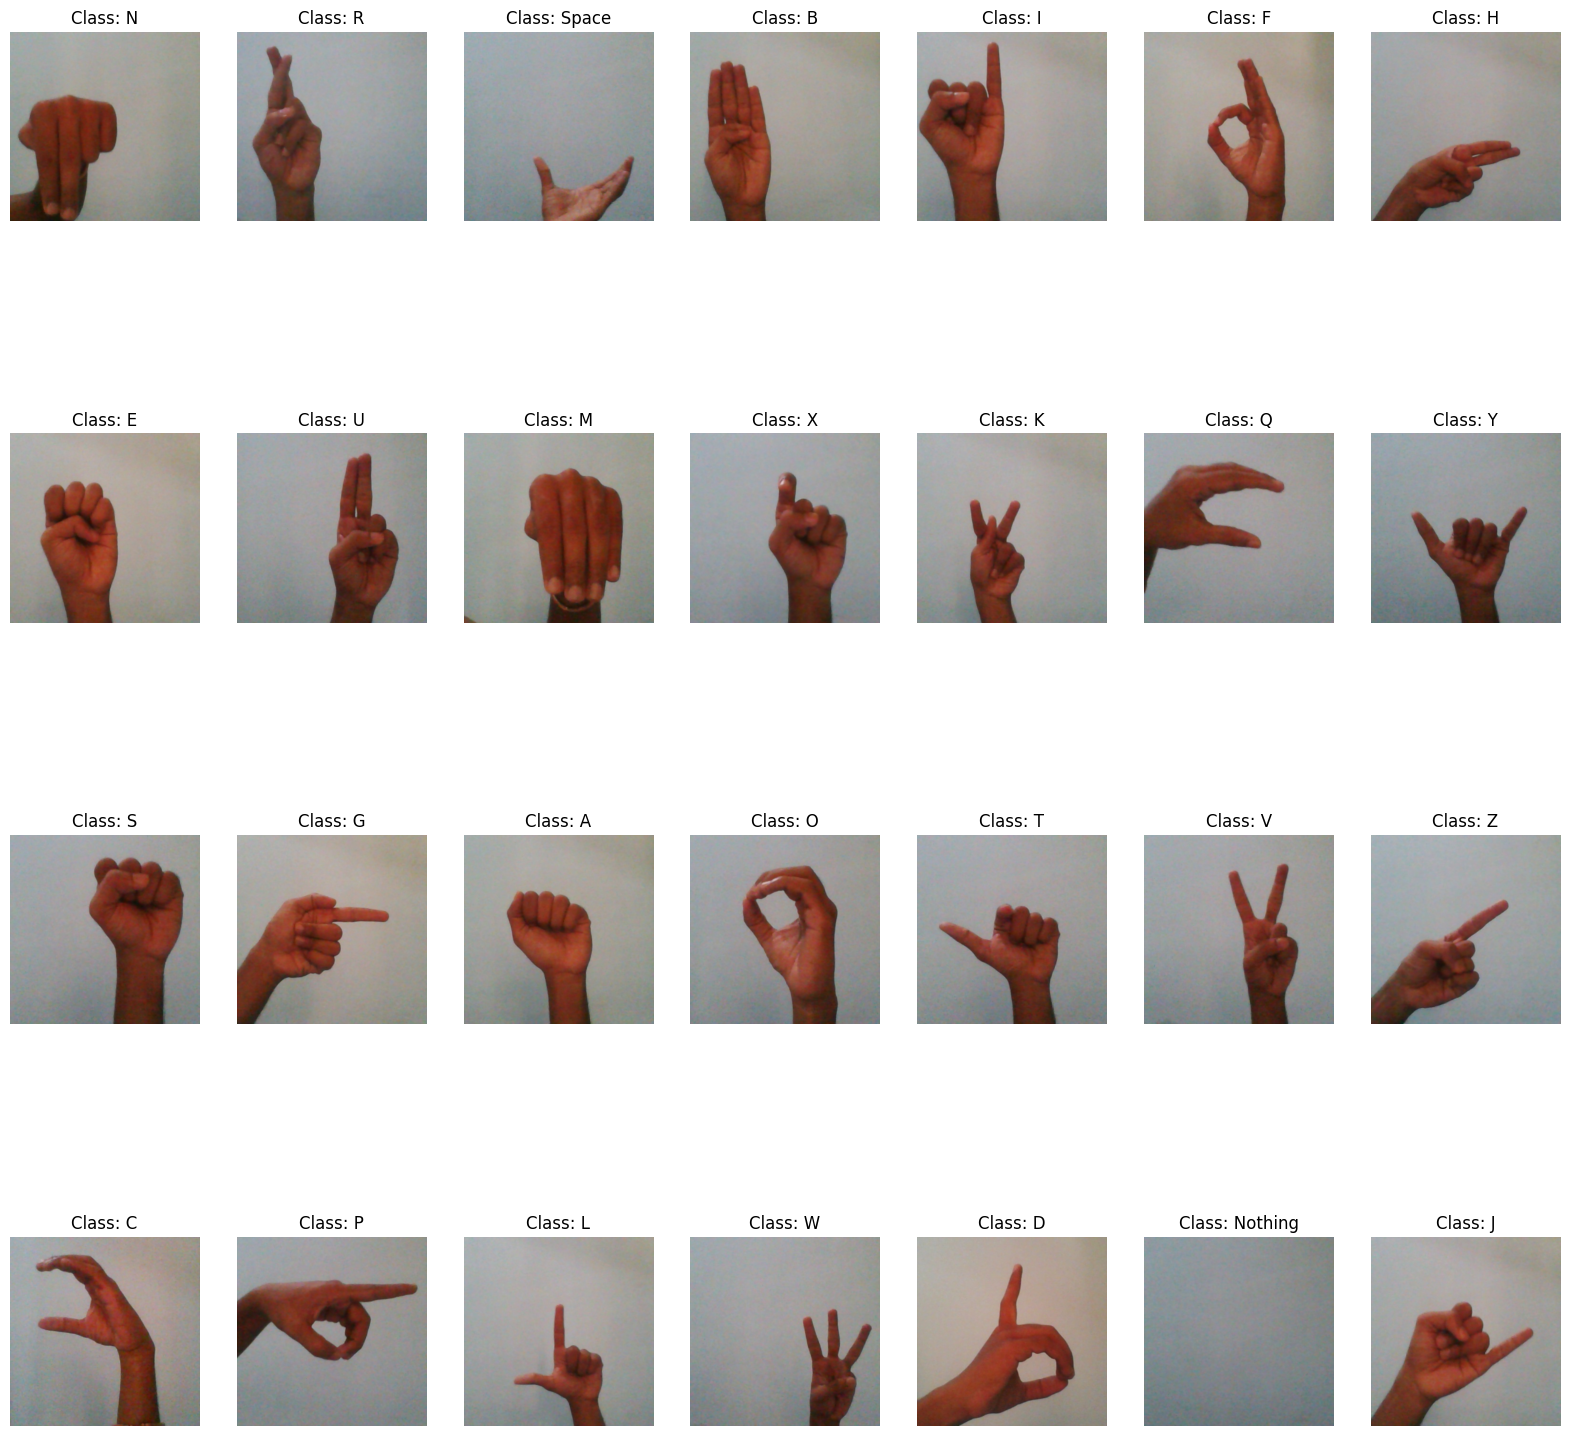

In [15]:
n=1

plt.figure(figsize=(20,20))     

for i in labels:

    class_folder = os.path.join(train_path, i) 

    image_name = os.listdir(class_folder)[0]  

    image_path = os.path.join(class_folder, image_name)

    image = Image.open(image_path)
    print(image,image_name)
    # 4 renglones de 7 columnas para 28 clases 
    plt.subplot(4,7,n)
    plt.imshow(image)
    plt.axis('off')
    plt.title(f"Class: {i}")
    n+=1

plt.show()

<hr>

## ANALYSIS DATASET

### SHOW DISTRIBUTION LABELS 

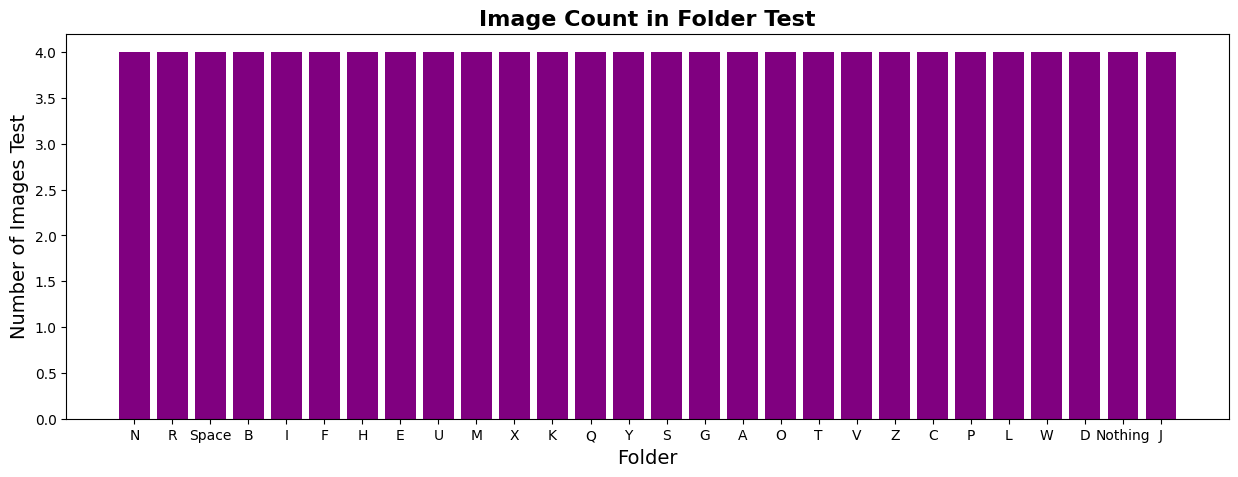

In [16]:
IMAGES=[]   

for i in labels:

    class_folder = os.path.join(test_path, i) 
    
    image_name = os.listdir(class_folder)
    nn=0
    for ii in range(len(image_name)):
        nn+=1
    #print(f'Folder: {i} {nn}')
    IMAGES.append(nn)

plt.figure(figsize=(15, 5)) 
plt.bar(labels, IMAGES,color="purple")
plt.ylabel('Number of Images Test', fontsize=14)
plt.xlabel('Folder', fontsize=14)
plt.title('Image Count in Folder Test', fontsize=16, fontweight='bold')
plt.show()


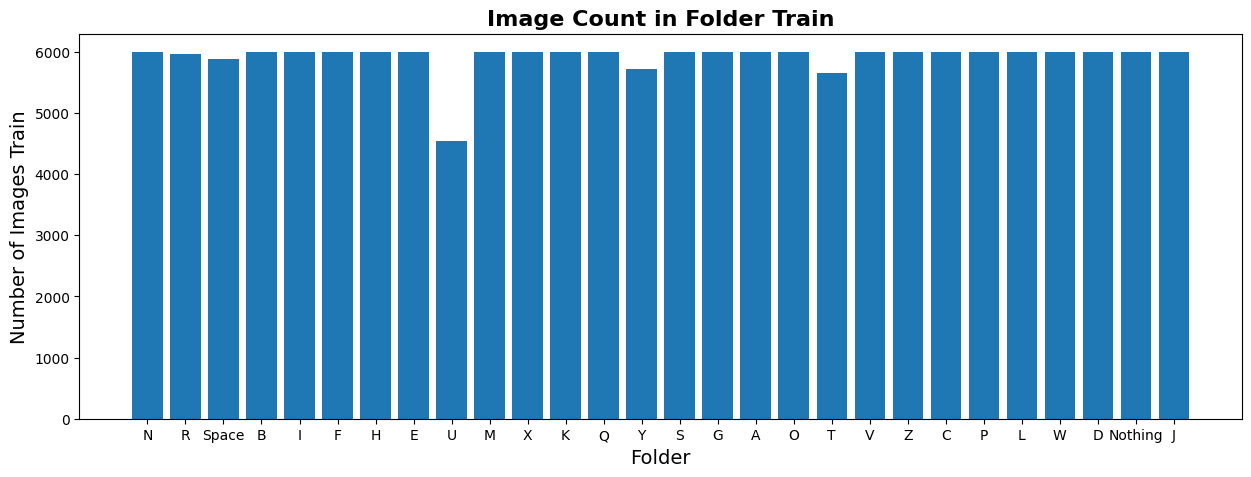

In [17]:

IMAGES=[]   

for i in labels:

    class_folder = os.path.join(train_path, i) 
    
    image_name = os.listdir(class_folder)
    nn=0
    for ii in range(len(image_name)):
        nn+=1
    #print(f'Folder: {i} {nn}')
    IMAGES.append(nn)

plt.figure(figsize=(15, 5)) 
plt.bar(labels, IMAGES)
plt.ylabel('Number of Images Train', fontsize=14)
plt.xlabel('Folder', fontsize=14)
plt.title('Image Count in Folder Train', fontsize=16, fontweight='bold')
plt.show()


        

<hr>

## DATA AUGMENTATION

### IMAGE GENERATOR - TRANSFORM IMAGES TO TRAIN

In [18]:


# Data augmentation configuration
train_datagen = ImageDataGenerator(
    rescale=1./255,                    # Normalize pixel values to the range [0, 1],
    shear_range=0.2,                   # Apply random shear transformations to the image (up to 20% intensity).
    zoom_range=0.2,                    # Randomly zoom in on the image by up to 20%.
    rotation_range=5,                 # Rotate the image by up to ±5 degrees.
    width_shift_range=0.03,            # Shift the image horizontally by up to 3%.
    height_shift_range=0.03,           # Shift the image vertically by up to 3%.
    brightness_range=[0.5, 1.75],      # Randomly adjust brightness between 50% and 175%.
    validation_split=0.1,              # Reserve 10% of the data for validation.
    fill_mode='nearest',               # Fill missing pixels after transformations with nearest pixel values.

)

### IMAGE GENERATOR - NORMALIZE IMAGES TO TEST

In [19]:
test_datagen=ImageDataGenerator(rescale=1./255)


<hr>

## SPLIT DATASET

### MAKE DATASET TO TRAIN, TEST AND VALIDATION

In [ ]:

###train generator
train_generator=train_datagen.flow_from_directory(
    train_path,
    target_size=(224,224),
    batch_size=32,
    class_mode='categorical',
    subset='training', #90%
    
)

#### validation generator
validation_generator = train_datagen.flow_from_directory(
    train_path,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='validation', #10%
   
)


#### test generator
test_generator=test_datagen.flow_from_directory(
    test_path,
    target_size=(224,224),
    batch_size=112,
    class_mode='categorical'
)


In [ ]:

# Definir una función para mostrar imágenes desde un generador
def mostrar_imagenes_generador(generator, num_images=9, title="Dataset"):
    # Obtén un lote de imágenes y etiquetas
    images, labels = next(generator)
    class_labels = list(generator.class_indices.keys())
    
    # Configurar la cuadrícula de visualización
    plt.figure(figsize=(10, 10))
    plt.suptitle(title, fontsize=16)

    for i in range(num_images):
        plt.subplot(3, 3, i + 1)
        plt.imshow(images[i])
        # Convertir etiqueta en una cadena con el nombre de la clase
        label_idx = np.argmax(labels[i])
        label_name = class_labels[label_idx]
        plt.title("Class "+label_name)
        plt.axis('off')
    
    plt.tight_layout()
    plt.show()

# Mostrar imágenes del conjunto de entrenamiento
mostrar_imagenes_generador(train_generator, num_images=9, title="Train Dataset")

# Mostrar imágenes del conjunto de validación
mostrar_imagenes_generador(validation_generator, num_images=9, title="Validation Dataset")

# Mostrar imágenes del conjunto de prueba
mostrar_imagenes_generador(test_generator, num_images=9, title="Test Dataset")

<hr>

## MODELS CNN 

### BASIC MODEL CCN 

In [ ]:
cnn=Sequential()
cnn.add(Input(shape=(224, 224, 3)))
# Primera capa convolucional
cnn.add(Conv2D(32, (3,3), activation='relu', kernel_regularizer=l2(0.001)))
cnn.add(BatchNormalization())
cnn.add(MaxPooling2D(2,2))
cnn.add(Dropout(0.2))

# Segunda capa convolucional
cnn.add(Conv2D(64, (3,3), activation='relu', kernel_regularizer=l2(0.001)))
cnn.add(BatchNormalization())
cnn.add(MaxPooling2D(2,2))
cnn.add(Dropout(0.3))

# Tercera capa convolucional
cnn.add(Conv2D(128, (3,3), activation='relu', kernel_regularizer=l2(0.001)))
cnn.add(BatchNormalization())
cnn.add(MaxPooling2D(2,2))
cnn.add(Dropout(0.3))

# Cuarta capa convolucional 
cnn.add(Conv2D(256, (3,3), activation='relu', kernel_regularizer=l2(0.001)))
cnn.add(BatchNormalization())
cnn.add(MaxPooling2D(2,2))
cnn.add(Dropout(0.3))

# Capa de Pooling global
cnn.add(GlobalAveragePooling2D())

# Capa densa con Dropout final
cnn.add(Dense(500, activation='relu'))
cnn.add(Dropout(0.5))
cnn.add(Dense(units=train_generator.num_classes, activation='softmax'))


plot_model(cnn, to_file="cnn_model.png", show_shapes=True, show_layer_names=True)

### OPTIMIZER CNN


In [ ]:
cnn.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=[
        Recall,
        Precision,
        'accuracy'
    ]
)
# Use ReduceLROnPlateau to reduce learning rate when the validation loss plateaus
lr_reduction = ReduceLROnPlateau(monitor='val_loss', patience=3, factor=0.5, min_lr=1e-6)


cnn.summary()

### TRAINNING CNN


In [ ]:

history=cnn.fit(train_generator,
                 epochs=10,
                 validation_data=validation_generator,
                 steps_per_epoch=train_generator.samples // train_generator.batch_size,
                 validation_steps=validation_generator.samples // validation_generator.batch_size,
                callbacks=[lr_reduction]
                )

results = cnn.evaluate(test_generator)
print("Test loss and accuracy:", results)

# Graficar la pérdida (loss) para entrenamiento y validación
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title("Training and Validation Loss")
plt.show()

# Graficar la precisión (accuracy) para entrenamiento y validación
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title("Training and Validation Accuracy")
plt.show()




### TEST

In [ ]:
def mostrar_imagenes_generador_model(generator, model, num_images=9, title="Dataset"):
    # Obtén un lote de imágenes y etiquetas
    images, labels = next(generator)
    class_labels = list(generator.class_indices.keys())
    
    # Configurar la cuadrícula de visualización
    plt.figure(figsize=(10, 10))
    plt.suptitle(title, fontsize=16)

    # Realizar predicciones con el modelo
    predictions = model.predict(images)

    for i in range(num_images):
        plt.subplot(8, 14, i + 1)
        plt.imshow(images[i])
        
        # Obtener etiquetas reales y predichas
        true_label_idx = np.argmax(labels[i])
        pred_label_idx = np.argmax(predictions[i])
        
        # Convertir índices a nombres de clase
        true_label_name = class_labels[true_label_idx]
        pred_label_name = class_labels[pred_label_idx]
        
        # Título con etiquetas real y predicha
        plt.title(f"Real: {true_label_name}\nPred: {pred_label_name}")
        plt.axis('off')
    
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

# Mostrar imágenes del conjunto de prueba
mostrar_imagenes_generador_model(test_generator, cnn, num_images=112, title="Test Dataset CNN")

In [ ]:
cnn.save('model_cnn.h5', include_optimizer=False)

<hr>

### MODEL CNN - LEARNING TRANSFER (MobilNet)

In [ ]:
MobilNet=Sequential()
MobilNet.add(MobileNetV2(weights='imagenet',include_top=False,input_shape=(224,224,3)))
MobilNet.add(BatchNormalization())
MobilNet.add(Flatten())
MobilNet.add(Dropout(0.5))
MobilNet.add(Dense(256, activation='relu'))
MobilNet.add(Dropout(0.5))
MobilNet.add(Dense(units=train_generator.num_classes,activation='softmax',kernel_regularizer=l2(0.001)))

dummy_data = np.zeros((1, 224, 224, 3))
MobilNet(dummy_data)
plot_model(MobilNet, to_file="MobilNet.png", show_shapes=True, show_layer_names=True)


### OPTIMIZER MobilNet

In [ ]:
MobilNet.compile(
    optimizer=Adam(),
    loss='categorical_crossentropy',
    metrics=[
        Recall,
        Precision,
        'accuracy'
    ]
)


MobilNet.summary()

### TRAINING MobilNet

In [ ]:

# Fit the model
history2 = MobilNet.fit(
    train_generator,
    epochs=7,
    validation_data=validation_generator,
    steps_per_epoch=train_generator.samples// train_generator.batch_size,
    validation_steps=validation_generator.samples// validation_generator.batch_size,
    batch_size=32

)

# Evaluate the model
results2 = MobilNet.evaluate(test_generator)
print("Test loss and accuracy:", results2)

# Graficar la pérdida (loss) para entrenamiento y validación
plt.plot(history2.history['loss'], label='Train Loss')
plt.plot(history2.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title("Training and Validation Loss")
plt.show()

# Graficar la precisión (accuracy) para entrenamiento y validación
plt.plot(history2.history['accuracy'], label='Train Accuracy')
plt.plot(history2.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title("Training and Validation Accuracy")
plt.show()




In [ ]:


def mostrar_imagenes_generador_model(generator, model, num_images=9, title="Dataset"):
    # Obtén un lote de imágenes y etiquetas
    images, labels = next(generator)
    class_labels = list(generator.class_indices.keys())
    
    # Configurar la cuadrícula de visualización
    plt.figure(figsize=(10, 10))
    plt.suptitle(title, fontsize=16)

    # Realizar predicciones con el modelo
    predictions = model.predict(images)

    for i in range(num_images):
        plt.subplot(8, 14, i + 1)
        plt.imshow(images[i])
        
        # Obtener etiquetas reales y predichas
        true_label_idx = np.argmax(labels[i])
        pred_label_idx = np.argmax(predictions[i])
        
        # Convertir índices a nombres de clase
        true_label_name = class_labels[true_label_idx]
        pred_label_name = class_labels[pred_label_idx]
        
        # Título con etiquetas real y predicha
        plt.title(f"Real: {true_label_name}\nPred: {pred_label_name}")
        plt.axis('off')
    
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

# Mostrar imágenes del conjunto de prueba
mostrar_imagenes_generador_model(test_generator, MobilNet, num_images=112, title="Test Dataset MobilNet")

In [ ]:
MobilNet.save('MobilNet.h5', include_optimizer=False)

<hr>

In [3]:
# Listar los dispositivos disponibles
print("Dispositivos disponibles:")
print(tf.config.list_physical_devices())

# Verificar si hay GPU
if tf.config.list_physical_devices('GPU'):
    print("¡Se está utilizando una GPU!")
else:
    print("No se detectó GPU. Keras está utilizando la CPU.")

Dispositivos disponibles:
[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'), PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
¡Se está utilizando una GPU!


## DATASET

In [2]:
train_path='/kaggle/input/dataset-hand-full-sign/DATSET_BIG'
labels=os.listdir(train_path)

print(labels,len(labels))

['N', 'R', 'SPACE', 'B', 'I', 'F', 'H', 'E', 'U', 'M', 'X', 'K', 'Q', 'Y', 'S', 'G', 'A', 'O', 'T', 'V', 'Z', 'C', 'P', 'L', 'W', 'D', 'NOTHING', 'J'] 28


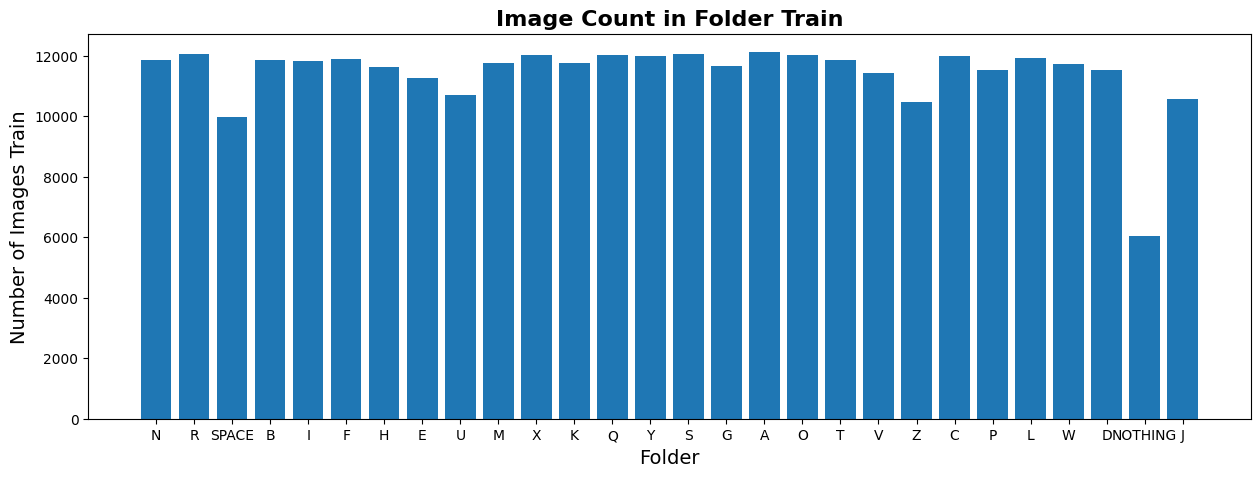

In [4]:
IMAGES=[]   

for i in labels:

    class_folder = os.path.join(train_path, i) 
    
    image_name = os.listdir(class_folder)
    nn=0
    for ii in range(len(image_name)):
        nn+=1
    #print(f'Folder: {i} {nn}')
    IMAGES.append(nn)

plt.figure(figsize=(15, 5)) 
plt.bar(labels, IMAGES)
plt.ylabel('Number of Images Train', fontsize=14)
plt.xlabel('Folder', fontsize=14)
plt.title('Image Count in Folder Train', fontsize=16, fontweight='bold')
plt.show()

In [3]:

# Data augmentation configuration
train = ImageDataGenerator(
    rescale=1./255,                    # Normalize pixel values to the range [0, 1],
    shear_range=0.2,                   # Apply random shear transformations to the image (up to 20% intensity).
    zoom_range=[0.9,1.1],                    # Randomly zoom in on the image by up to 20%.                # Rotate the image by up to ±5 degrees.
    width_shift_range=0.2,            # Shift the image horizontally by up to 3%.
    height_shift_range=0.2,           # Shift the image vertically by up to 3%.
    brightness_range=[0.7, 1.3],      # Randomly adjust brightness between 50% and 175%.
    validation_split=0.1,              # Reserve 10% of the data for validation.


)

train_generator = train.flow_from_directory(
    train_path,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    #color_mode='grayscale',  # Cargar imágenes en escala de grises
    subset='training',
    shuffle=True 
)

val_generator = train.flow_from_directory(
    train_path,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    #color_mode='grayscale',  # Cargar imágenes en escala de grises
    subset='validation',
    shuffle=True 
)


Found 287603 images belonging to 28 classes.
Found 31942 images belonging to 28 classes.


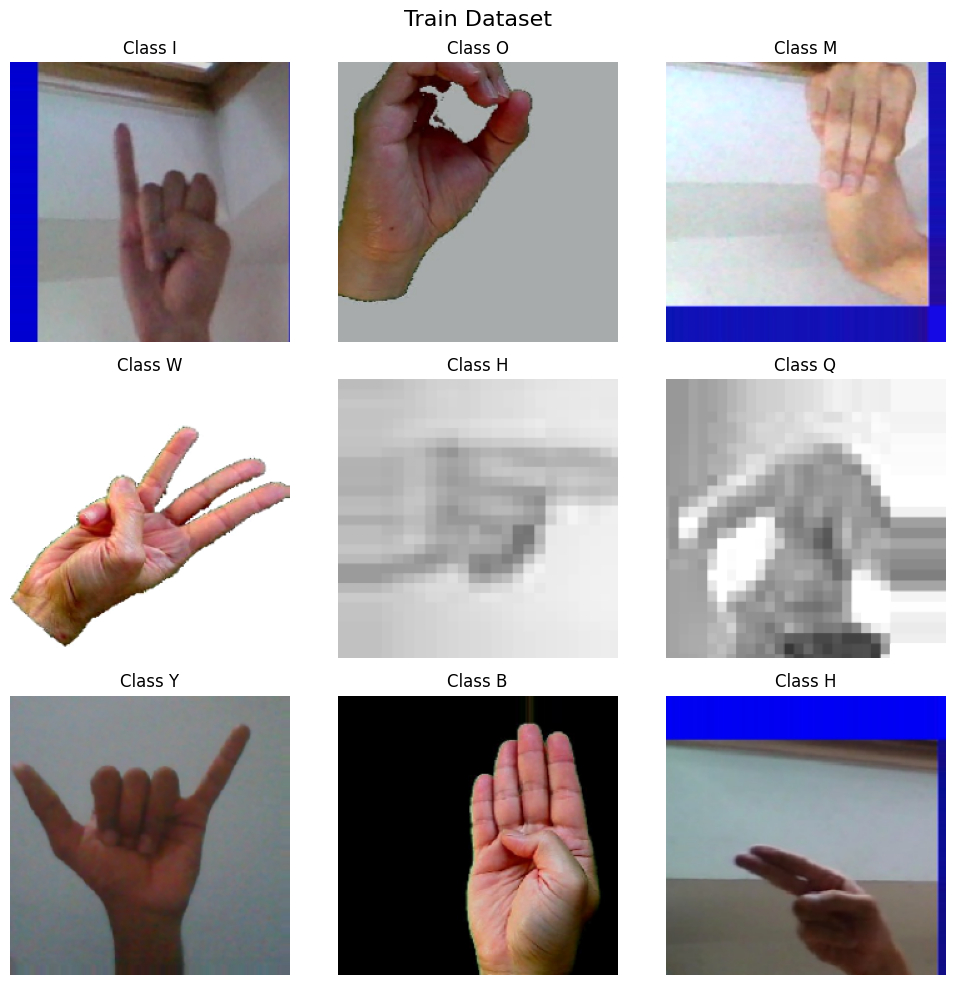

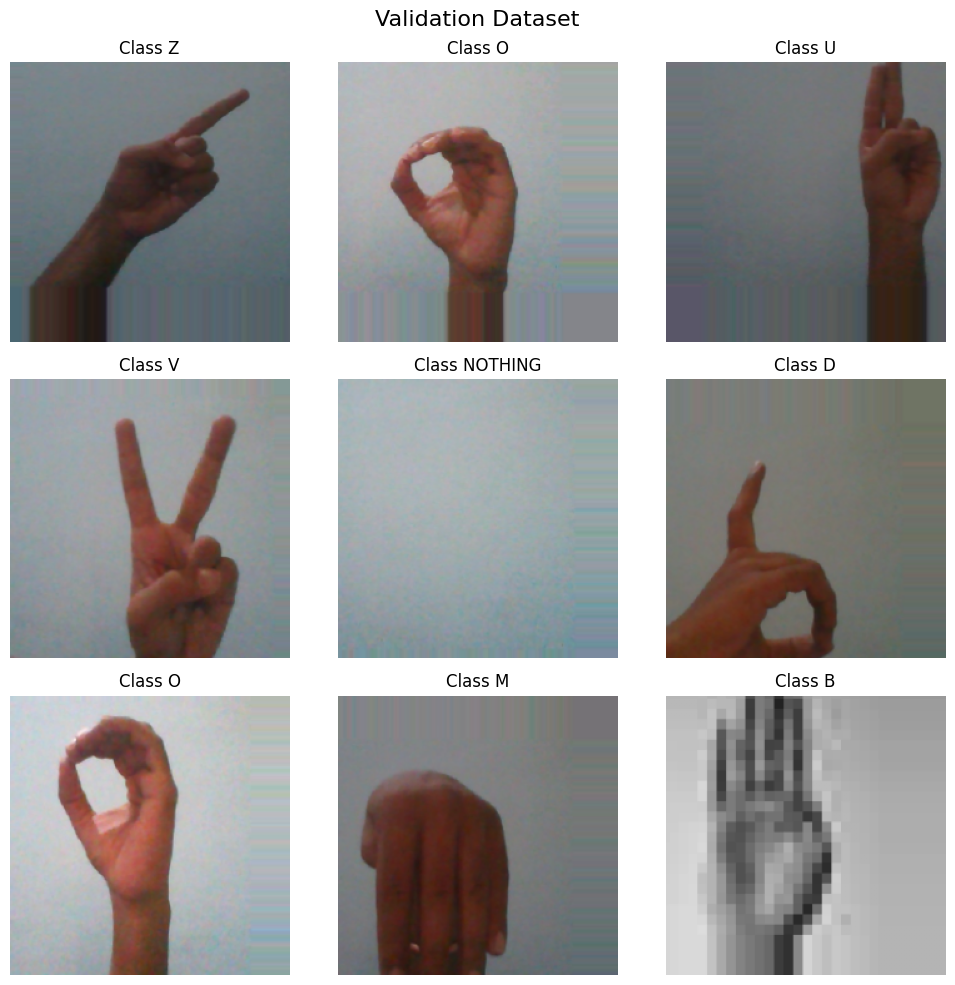

In [4]:
# Definir una función para mostrar imágenes desde un generador
def mostrar_imagenes_generador(generator, num_images=9, title="Dataset"):
    # Obtén un lote de imágenes y etiquetas
    images, labels = next(generator)
    class_labels = list(generator.class_indices.keys())
    
    # Configurar la cuadrícula de visualización
    plt.figure(figsize=(10, 10))
    plt.suptitle(title, fontsize=16)

    for i in range(num_images):
        plt.subplot(3, 3, i + 1)
        plt.imshow(images[i])
        # Convertir etiqueta en una cadena con el nombre de la clase
        label_idx = np.argmax(labels[i])
        label_name = class_labels[label_idx]
        plt.title("Class "+label_name)
        plt.axis('off')
    
    plt.tight_layout()
    plt.show()

# Mostrar imágenes del conjunto de entrenamiento
mostrar_imagenes_generador(train_generator, num_images=9, title="Train Dataset")

# Mostrar imágenes del conjunto de validación
mostrar_imagenes_generador(val_generator, num_images=9, title="Validation Dataset")


In [23]:


Net3=Sequential()
Net3.add(MobileNetV2(weights='imagenet',include_top=False,input_shape=(224,224,3)))
Net3.add(BatchNormalization())
Net3.add(GlobalAveragePooling2D())
Net3.add(Dense(1024, activation='relu'))
Net3.add(Dropout(0.5))
Net3.add(Dense(units=train_generator.num_classes,activation='softmax',kernel_regularizer=l1(0.1)))
print('Right')


Right


In [24]:


# Compilación del modelo
Net3.compile(
    optimizer=Adam(0.00001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Callback de EarlyStopping
early_stop = EarlyStopping(
    monitor='val_loss',
    patience=2,  
    restore_best_weights=True
)

# Callback para reducir la tasa de aprendizaje
lr_reduction = ReduceLROnPlateau(monitor='val_loss', patience=2, factor=0.5, min_lr=1e-6)

checkpoint_callback = ModelCheckpoint(
    filepath="best_weights.weights.h5",  # Nombre del archivo donde se guardarán los mejores pesos
    monitor="val_loss",         # Métrica a monitorear
    save_best_only=True,        # Guardar solo si se mejora la métrica monitoreada
    save_weights_only=True,     # Guardar únicamente los pesos del modelo
    mode="min",                 # Modo "min" porque queremos minimizar la pérdida
    verbose=1                   # Mostrar información sobre el guardado de pesos
)
print('Right')

Right


Epoch 1/2
8988/8988 ━━━━━━━━━━━━━━━━━━━━ 0s 568ms/step - accuracy: 0.6827 - loss: 62.4695
Epoch 1: val_loss improved from inf to 1.61307, saving model to best_weights.weights.h5
8988/8988 ━━━━━━━━━━━━━━━━━━━━ 5744s 635ms/step - accuracy: 0.6827 - loss: 62.4661 - val_accuracy: 0.9426 - val_loss: 1.6131 - learning_rate: 1.0000e-05
Epoch 2/2
8988/8988 ━━━━━━━━━━━━━━━━━━━━ 0s 410ms/step - accuracy: 0.9592 - loss: 1.3477
Epoch 2: val_loss improved from 1.61307 to 0.64712, saving model to best_weights.weights.h5
8988/8988 ━━━━━━━━━━━━━━━━━━━━ 4085s 454ms/step - accuracy: 0.9592 - loss: 1.3477 - val_accuracy: 0.9890 - val_loss: 0.6471 - learning_rate: 1.0000e-05


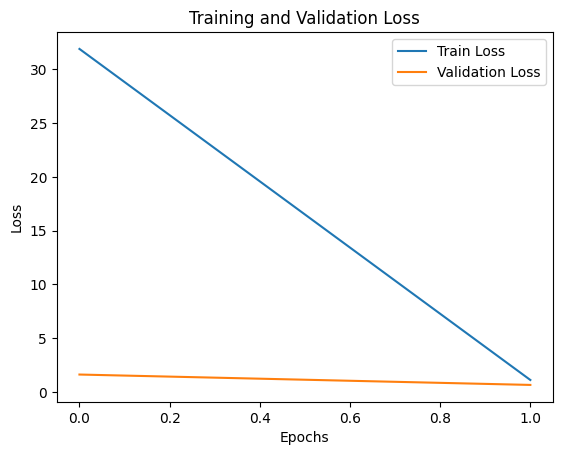

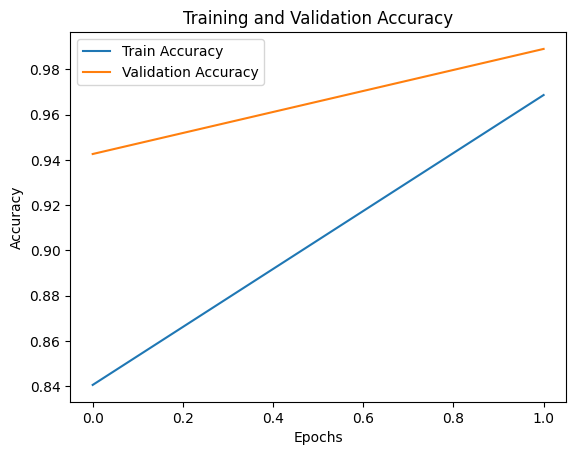

In [25]:

# Entrenamiento del modelo
history3 = Net3.fit(
    train_generator,
    validation_data=val_generator,
    epochs=2,
    #steps_per_epoch=(train_generator.samples // train_generator.batch_size),
    #validation_steps=(val_generator.samples // val_generator.batch_size),
    verbose=1,
    callbacks=[early_stop, lr_reduction,checkpoint_callback]
)

# Graficar la pérdida (loss) para entrenamiento y validación
plt.plot(history3.history['loss'], label='Train Loss')
plt.plot(history3.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title("Training and Validation Loss")
plt.show()

# Graficar la precisión (accuracy) para entrenamiento y validación
plt.plot(history3.history['accuracy'], label='Train Accuracy')
plt.plot(history3.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title("Training and Validation Accuracy")
plt.show()

# Guardar el modelo entrenado
Net3.save('MobileNet3.h5')

In [9]:
mv RestNet2.h5 /kaggle/working/

/opt/conda/lib/python3.10/pty.py:89: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid, fd = os.forkpty()


mv: cannot stat 'RestNet.h5': No such file or directory


Found 112 images belonging to 28 classes.
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


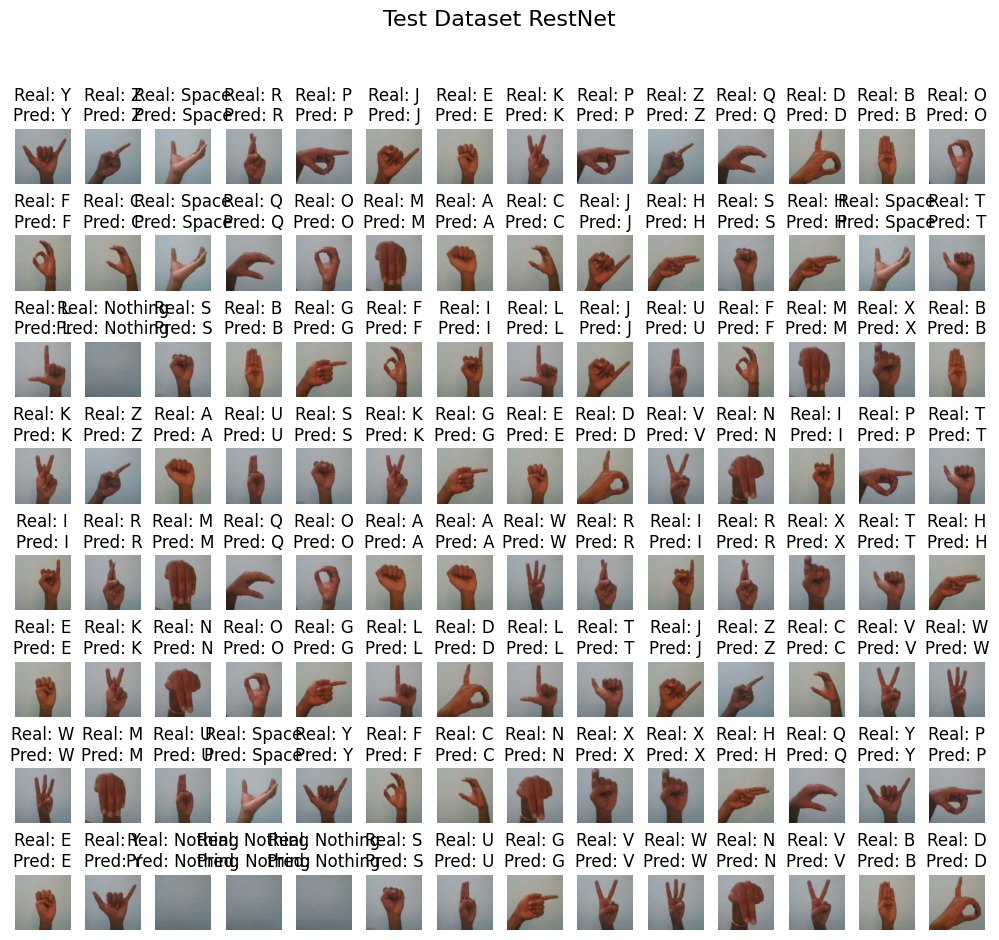

In [32]:
test_path= '/kaggle/input/american-sign-language/ASL_Dataset/Test'
test_datagen=ImageDataGenerator(rescale=1./255)
#### test generator
test_generator2=test_datagen.flow_from_directory(
    test_path,
    target_size=(224,224),
    batch_size=112,
    class_mode='categorical'
)
model_path = '/kaggle/input/models/keras/default/1/MobilNet_first.h5'

# Load the trained model
model = load_model(model_path)

def mostrar_imagenes_generador_model(generator, model, num_images=9, title="Dataset"):
    # Obtén un lote de imágenes y etiquetas
    images, labels = next(generator)
    class_labels = list(generator.class_indices.keys())
    
    # Configurar la cuadrícula de visualización
    plt.figure(figsize=(10, 10))
    plt.suptitle(title, fontsize=16)

    # Realizar predicciones con el modelo
    predictions = model.predict(images)

    for i in range(num_images):
        plt.subplot(8, 14, i + 1)
        plt.imshow(images[i])
        
        # Obtener etiquetas reales y predichas
        true_label_idx = np.argmax(labels[i])
        pred_label_idx = np.argmax(predictions[i])
        
        # Convertir índices a nombres de clase
        true_label_name = class_labels[true_label_idx]
        pred_label_name = class_labels[pred_label_idx]
        
        # Título con etiquetas real y predicha
        plt.title(f"Real: {true_label_name}\nPred: {pred_label_name}")
        plt.axis('off')
    
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

# Mostrar imágenes del conjunto de prueba
mostrar_imagenes_generador_model(test_generator2, Net3, num_images=112, title="Test Dataset RestNet")

In [3]:
test_path= '/kaggle/input/american-sign-language/ASL_Dataset/Test'
test_datagen=ImageDataGenerator(rescale=1./255)
#### test generator
test_generator2=test_datagen.flow_from_directory(
    test_path,
    target_size=(224,224),
    batch_size=112,
    class_mode='categorical'
)

Found 112 images belonging to 28 classes.


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━

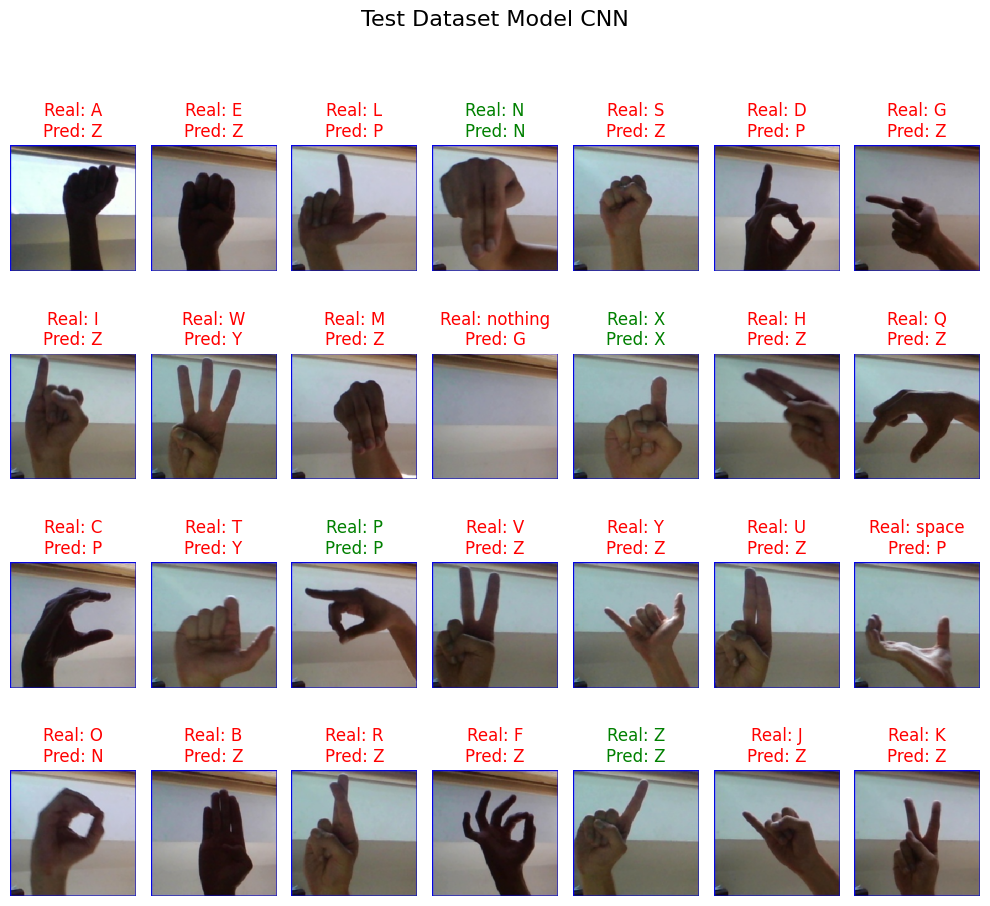

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━

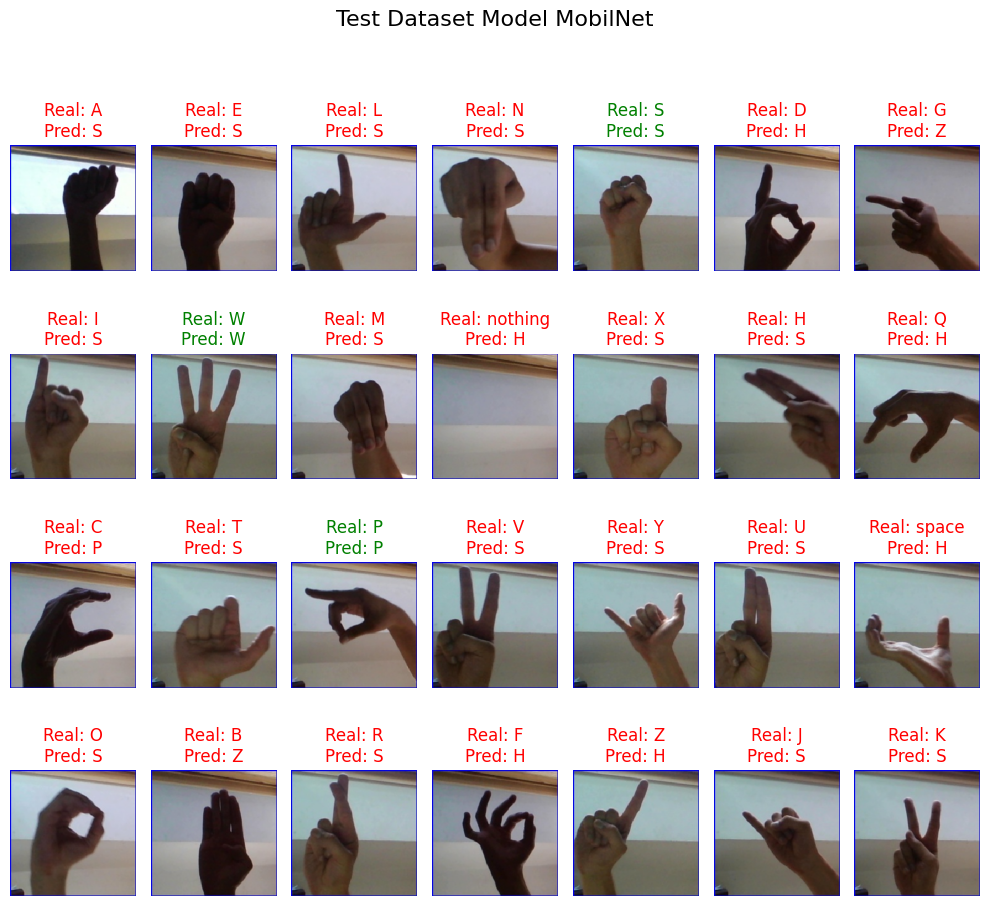

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━

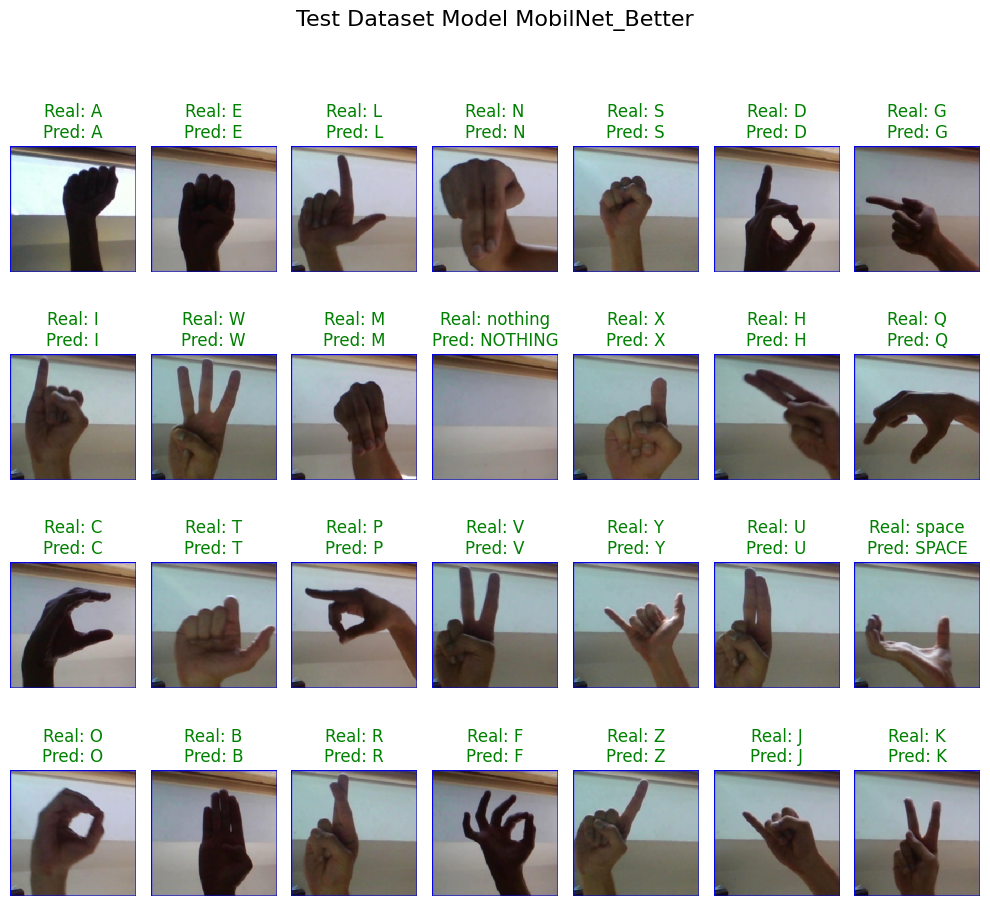

In [46]:
import numpy as np
import matplotlib.pyplot as plt
import os
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.models import load_model

# Paths to models and test images
model_paths = [
    '/kaggle/input/models3/keras/default/1/model_cnn.h5',
    '/kaggle/input/models/keras/default/1/MobilNet_first.h5',
    '/kaggle/input/models2/keras/default/1/MobileNet3.h5',
]
test_images_path = '/kaggle/input/aslamerican-sign-language-aplhabet-dataset/ASL_Alphabet_Dataset/asl_alphabet_test'

# Define image size expected by the models
img_size = (224, 224)

# Lists for storing images and labels
images = []
labels = []
total =[]
# Load images and labels
for filename in os.listdir(test_images_path):
    if filename.endswith('.jpg'):  # Filter only images
        # Full path to the image
        filepath = os.path.join(test_images_path, filename)
        # Load image and convert to array
        img = load_img(filepath, target_size=img_size)  # Resize
        img_array = img_to_array(img) / 255.0  # Normalize to [0, 1]
        # Extract label from the filename
        label = filename.split('_')[0]  # Extract prefix as label
        
        # Add to lists
        images.append(img_array)  # Add image array (not filepath)
        labels.append(label)

# Convert lists to numpy arrays for model compatibility
images = np.array(images)
labels = np.array(labels)

# Class labels
class_labels = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'NOTHING', 'O', 'P', 'Q', 'R', 'S', 'SPACE', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']

def mostrar_imagenes_generador_model(images, labels, model, num_images=9, title="Dataset"):
    global totales
    predictions = []
    plt.figure(figsize=(10, 10))
    plt.suptitle(title, fontsize=16)
    
    for ii in range(len(images[:num_images])):
        # Perform predictions with the model
        pred = model.predict(np.expand_dims(images[ii], axis=0))
        predictions.append(pred)

    for ii in range(num_images):
        plt.subplot(4, 7, ii + 1)  # Adjust layout
        plt.imshow(images[ii])
        
        # Convert indices to class names
        pred_label_idx = np.argmax(predictions[ii])
        pred_label_name = class_labels[pred_label_idx]
        
        # True label (assumes ground-truth labels are numeric indices)
        true_label_name = labels[ii] 
        
        # Title with real and predicted labels
        if pred_label_name == true_label_name.upper():
            plt.title(f"Real: {true_label_name}\nPred: {pred_label_name}", color='green')
            totales+=1
        else:
            plt.title(f"Real: {true_label_name}\nPred: {pred_label_name}", color='red')
        plt.axis('off')
        
    total.append(totales*100//28)
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

# Display test images for each model
totales=0
modelos=['CNN','MobilNet','MobilNet_Better']
for i, model_path in enumerate(model_paths):
    model = load_model(model_path)
    totales=0
    mostrar_imagenes_generador_model(images, labels, model, num_images=28, title=f"Test Dataset Model {modelos[i]}")



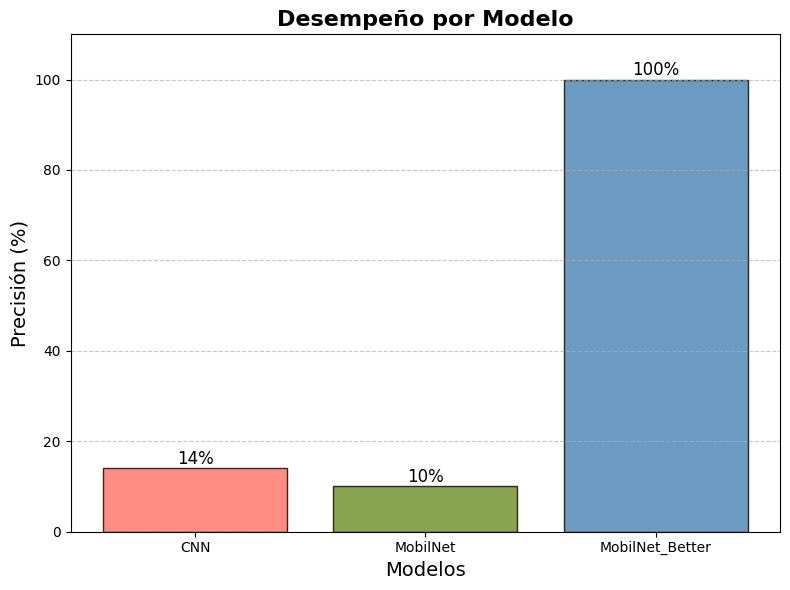

In [45]:
modelos=['CNN','MobilNet','MobilNet_Better']

# Crear gráfico de barras con diseño mejorado
plt.figure(figsize=(8, 6))
colors = ['#FF6F61', '#6B8E23', '#4682B4']  # Colores personalizados para cada barra
bars = plt.bar(modelos, total, color=colors, alpha=0.8, edgecolor='black')

# Agregar etiquetas a las barras
for bar in bars:
    yval = bar.get_height()
    plt.text((bar.get_x() + bar.get_width() / 2), yval + 1, f"{yval}%", ha='center', fontsize=12, color='black')

# Personalizar ejes y título
plt.title("Desempeño por Modelo", fontsize=16, fontweight='bold')
plt.xlabel("Modelos", fontsize=14)
plt.ylabel("Precisión (%)", fontsize=14)
plt.ylim(0, max(total) + 10)  # Ajustar límite superior
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Líneas de guía horizontales

# Mostrar gráfica
plt.tight_layout()
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


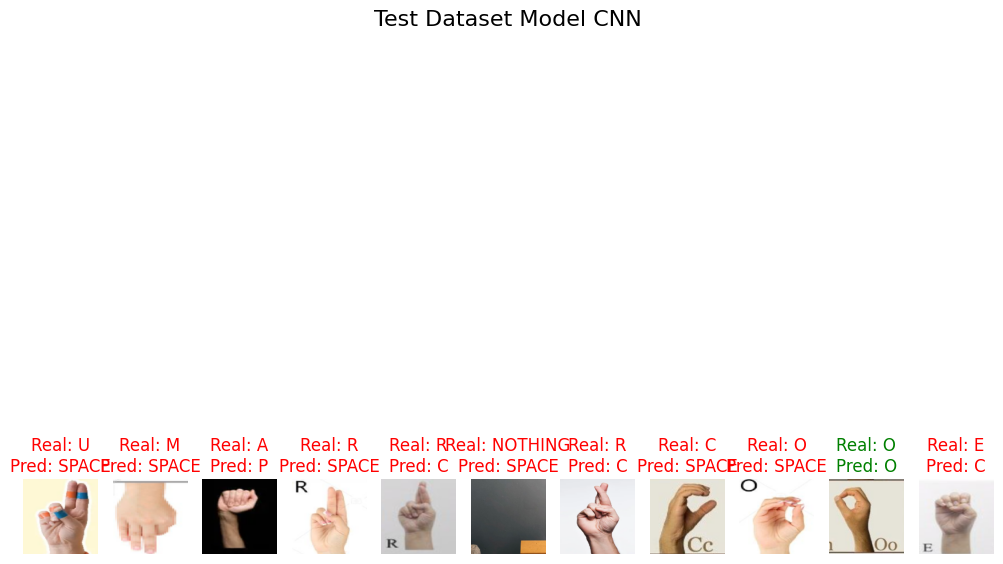

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


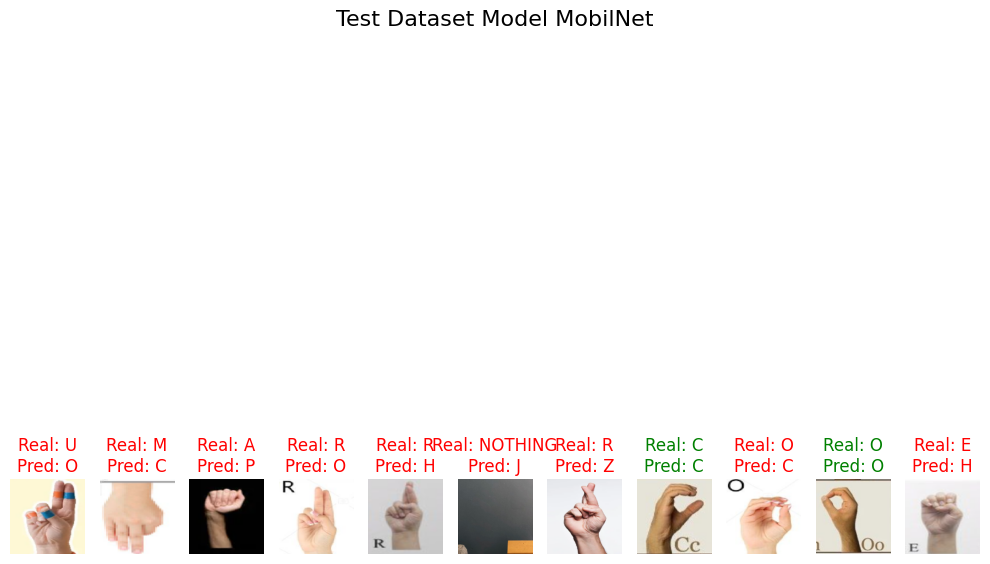

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


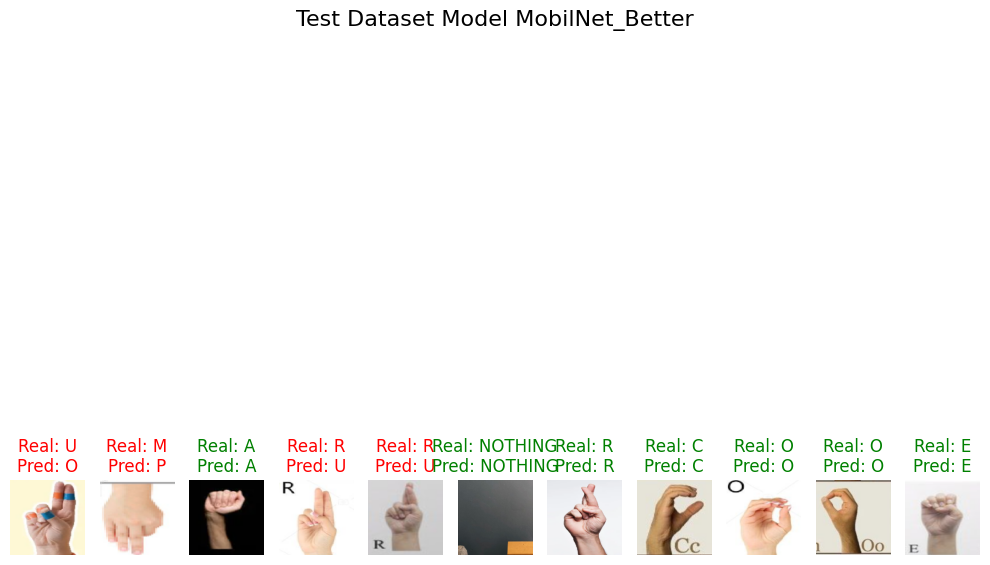

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import os
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.models import load_model

# Paths to models and test images
model_paths = [
    '/kaggle/input/models3/keras/default/1/model_cnn.h5',
    '/kaggle/input/models/keras/default/1/MobilNet_first.h5',
    '/kaggle/input/models2/keras/default/1/MobileNet3.h5',
]
test_images_path = '/kaggle/input/dataset-internet/Dataset_Internet'

# Define image size expected by the models
img_size = (224, 224)

# Lists for storing images and labels
images = []
labels = []
total =[]
# Load images and labels
for filename in os.listdir(test_images_path):
    if filename.endswith('.png'):  # Filter only images
        # Full path to the image
        filepath = os.path.join(test_images_path, filename)
        # Load image and convert to array
        img = load_img(filepath, target_size=img_size)  # Resize
        img_array = img_to_array(img) / 255.0  # Normalize to [0, 1]
        # Extract label from the filename
        label = filename.split('_')[0]  # Extract prefix as label
        
        # Add to lists
        images.append(img_array)  # Add image array (not filepath)
        labels.append(label)

# Convert lists to numpy arrays for model compatibility
images = np.array(images)
labels = np.array(labels)

# Class labels
class_labels = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'NOTHING', 'O', 'P', 'Q', 'R', 'S', 'SPACE', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']

def mostrar_imagenes_generador_model(images, labels, model, num_images=9, title="Dataset"):
    global totales
    predictions = []
    plt.figure(figsize=(10, 10))
    plt.suptitle(title, fontsize=16)
    
    for ii in range(len(images[:num_images])):
        # Perform predictions with the model
        pred = model.predict(np.expand_dims(images[ii], axis=0))
        predictions.append(pred)

    for ii in range(num_images):
        plt.subplot(1, 11, ii + 1)  # Adjust layout
        plt.imshow(images[ii])
        
        # Convert indices to class names
        pred_label_idx = np.argmax(predictions[ii])
        pred_label_name = class_labels[pred_label_idx]
        
        # True label (assumes ground-truth labels are numeric indices)
        true_label_name = labels[ii] 
        
        # Title with real and predicted labels
        if pred_label_name == true_label_name.upper():
            plt.title(f"Real: {true_label_name}\nPred: {pred_label_name}", color='green')
            totales+=1
        else:
            plt.title(f"Real: {true_label_name}\nPred: {pred_label_name}", color='red')
        plt.axis('off')
        
    total.append(totales*100//11)
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

# Display test images for each model
totales=0
modelos=['CNN','MobilNet','MobilNet_Better']
for i, model_path in enumerate(model_paths):
    model = load_model(model_path)
    totales=0
    mostrar_imagenes_generador_model(images, labels, model, num_images=11, title=f"Test Dataset Model {modelos[i]}")




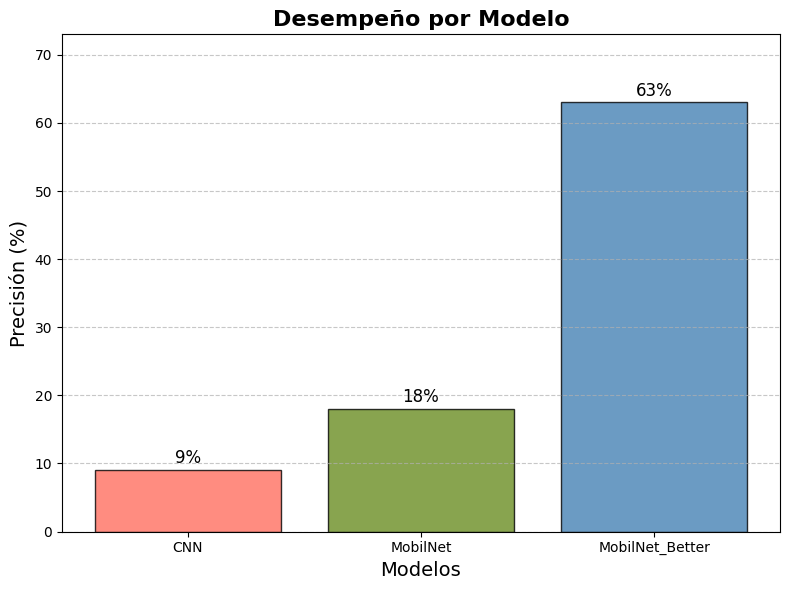

In [16]:
modelos=['CNN','MobilNet','MobilNet_Better']

# Crear gráfico de barras con diseño mejorado
plt.figure(figsize=(8, 6))
colors = ['#FF6F61', '#6B8E23', '#4682B4']  # Colores personalizados para cada barra
bars = plt.bar(modelos, total, color=colors, alpha=0.8, edgecolor='black')

# Agregar etiquetas a las barras
for bar in bars:
    yval = bar.get_height()
    plt.text((bar.get_x() + bar.get_width() / 2), yval + 1, f"{yval}%", ha='center', fontsize=12, color='black')

# Personalizar ejes y título
plt.title("Desempeño por Modelo", fontsize=16, fontweight='bold')
plt.xlabel("Modelos", fontsize=14)
plt.ylabel("Precisión (%)", fontsize=14)
plt.ylim(0, max(total) + 10)  # Ajustar límite superior
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Líneas de guía horizontales

# Mostrar gráfica
plt.tight_layout()
plt.show()


Evaluating Model: CNN
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0

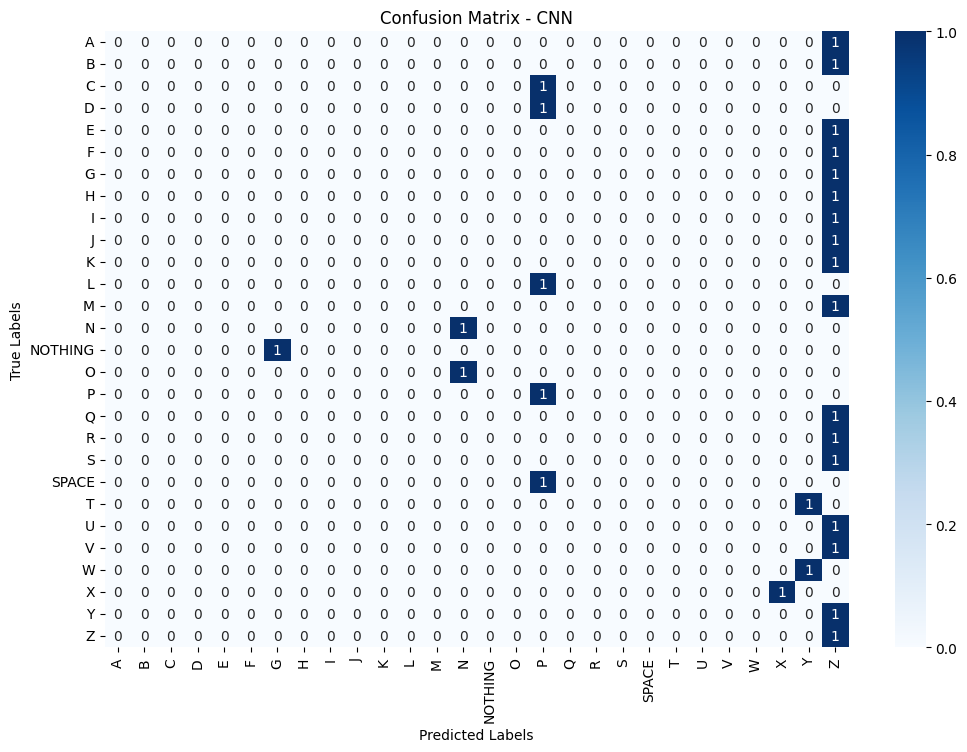

F1-Score (Weighted): 0.0754

Classification Report:
              precision    recall  f1-score   support

           A       0.00      0.00      0.00         1
           B       0.00      0.00      0.00         1
           C       0.00      0.00      0.00         1
           D       0.00      0.00      0.00         1
           E       0.00      0.00      0.00         1
           F       0.00      0.00      0.00         1
           G       0.00      0.00      0.00         1
           H       0.00      0.00      0.00         1
           I       0.00      0.00      0.00         1
           J       0.00      0.00      0.00         1
           K       0.00      0.00      0.00         1
           L       0.00      0.00      0.00         1
           M       0.00      0.00      0.00         1
           N       0.50      1.00      0.67         1
     NOTHING       0.00      0.00      0.00         1
           O       0.00      0.00      0.00         1
           P       0.20      

/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



Evaluating Model: MobilNet
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━

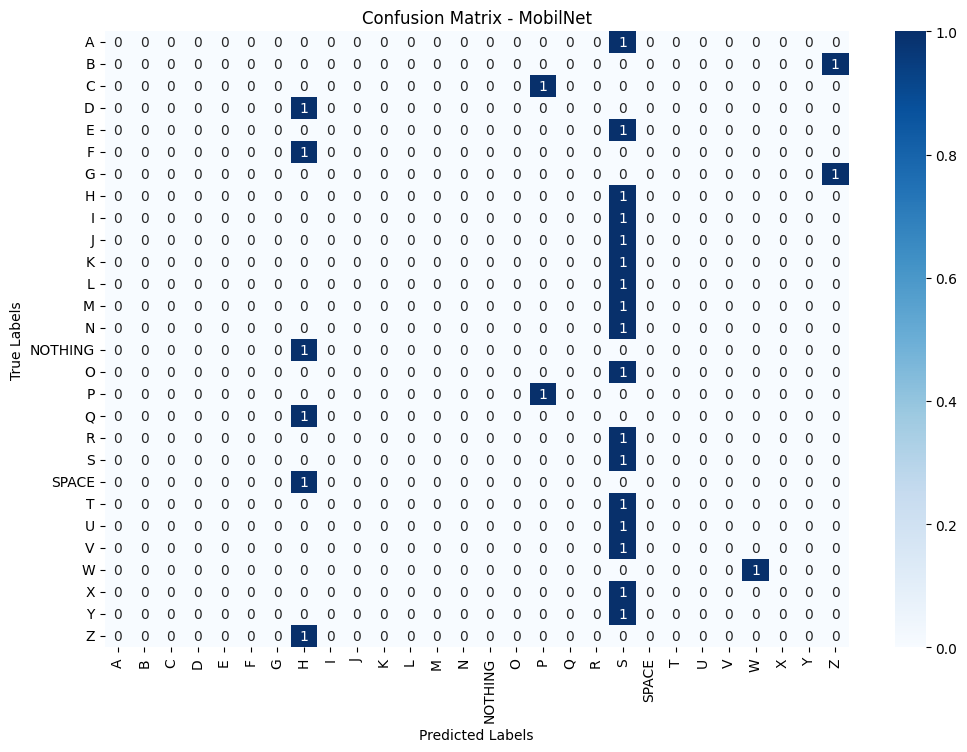

F1-Score (Weighted): 0.0635

Classification Report:
              precision    recall  f1-score   support

           A       0.00      0.00      0.00         1
           B       0.00      0.00      0.00         1
           C       0.00      0.00      0.00         1
           D       0.00      0.00      0.00         1
           E       0.00      0.00      0.00         1
           F       0.00      0.00      0.00         1
           G       0.00      0.00      0.00         1
           H       0.00      0.00      0.00         1
           I       0.00      0.00      0.00         1
           J       0.00      0.00      0.00         1
           K       0.00      0.00      0.00         1
           L       0.00      0.00      0.00         1
           M       0.00      0.00      0.00         1
           N       0.00      0.00      0.00         1
     NOTHING       0.00      0.00      0.00         1
           O       0.00      0.00      0.00         1
           P       0.50      

/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



Evaluating Model: MobilNet_Better
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━

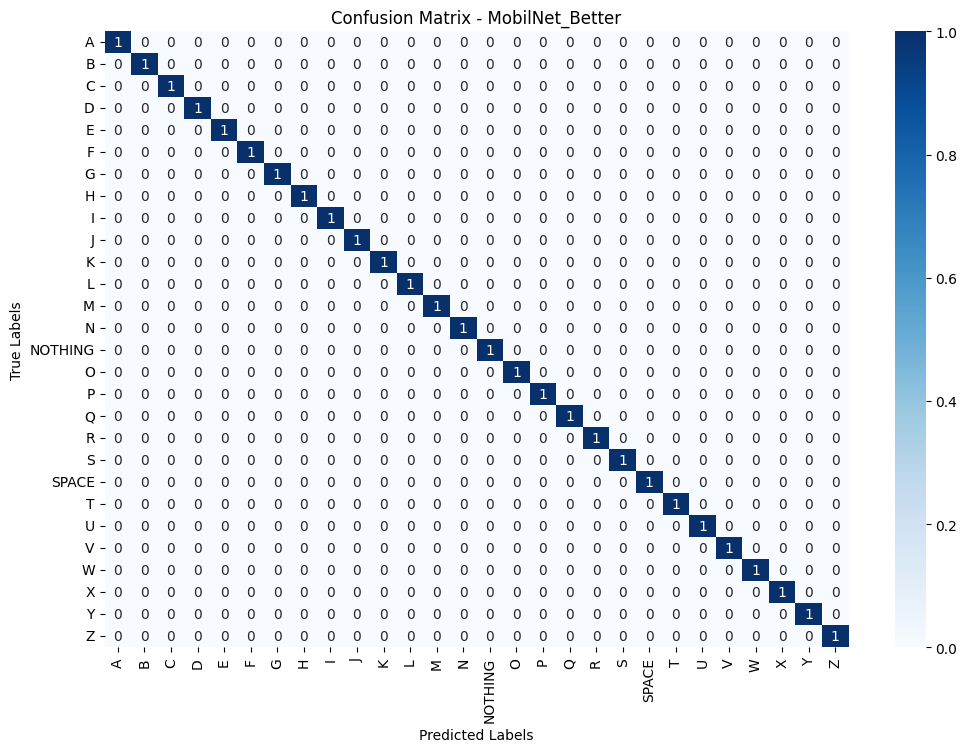

F1-Score (Weighted): 1.0000

Classification Report:
              precision    recall  f1-score   support

           A       1.00      1.00      1.00         1
           B       1.00      1.00      1.00         1
           C       1.00      1.00      1.00         1
           D       1.00      1.00      1.00         1
           E       1.00      1.00      1.00         1
           F       1.00      1.00      1.00         1
           G       1.00      1.00      1.00         1
           H       1.00      1.00      1.00         1
           I       1.00      1.00      1.00         1
           J       1.00      1.00      1.00         1
           K       1.00      1.00      1.00         1
           L       1.00      1.00      1.00         1
           M       1.00      1.00      1.00         1
           N       1.00      1.00      1.00         1
     NOTHING       1.00      1.00      1.00         1
           O       1.00      1.00      1.00         1
           P       1.00      

In [2]:
from sklearn.metrics import f1_score, confusion_matrix, classification_report
import seaborn as sns

# Function to evaluate model and calculate F1-score
def evaluate_model_with_f1(images, labels, model, class_labels, title="Confusion Matrix"):
    y_true = []
    y_pred = []
    
    # Generate predictions
    for img, label in zip(images, labels):
        pred = model.predict(np.expand_dims(img, axis=0))
        pred_label_idx = np.argmax(pred)
        pred_label_name = class_labels[pred_label_idx]
        
        y_true.append(label.upper())  # True label
        y_pred.append(pred_label_name)  # Predicted label
    
    # Calculate confusion matrix
    cm = confusion_matrix(y_true, y_pred, labels=class_labels)
    
    # Visualize confusion matrix
    plt.figure(figsize=(12, 8))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
    plt.title(title)
    plt.xlabel("Predicted Labels")
    plt.ylabel("True Labels")
    plt.show()
    
    # Calculate F1-score
    f1 = f1_score(y_true, y_pred, average='weighted')  # Weighted average for imbalanced datasets
    print(f"F1-Score (Weighted): {f1:.4f}")
    
    # Print classification report
    print("\nClassification Report:")
    print(classification_report(y_true, y_pred, target_names=class_labels))
    
    return f1

# Evaluate each model
model_names = ['CNN', 'MobilNet', 'MobilNet_Better']
f1_scores = []
for i, model_path in enumerate(model_paths):
    model = load_model(model_path)
    print(f"\nEvaluating Model: {model_names[i]}")
    f1 = evaluate_model_with_f1(images, labels, model, class_labels, title=f"Confusion Matrix - {model_names[i]}")
    f1_scores.append((model_names[i], f1))

# Print F1-scores for all models
print("\nSummary of F1-Scores:")
for model_name, f1 in f1_scores:
    print(f"{model_name}: F1-Score = {f1:.4f}")
